In [1]:
import numpy as np
import pylab as plt
from matplotlib import cm
from sqlitedict import SqliteDict

In [17]:
def getSpaceAndLoss(fpath):
    db = SqliteDict(fpath)
    db_name = list(db.keys())[0]
    pz = db[db_name]['loss']
    pz = -np.array(pz)
    pz[np.where(pz == 1111)] = 0
    
    return db[db_name]['vals'], pz

def plotSpace(vals, pz, sx, sy):
    px = vals[sx]
    py = vals[sy]
    mx = px[np.argmax(pz)]
    my = py[np.argmax(pz)]

    plt.title('Hyperparameter space')
    plt.scatter(x=px, y=py, c=pz, cmap=cm.jet)
    plt.colorbar()
    plt.scatter(x=mx, y=my, marker='x', s=150, c='r')
    plt.xlim(np.min(px), np.max(px))
    plt.ylim(np.min(py), np.max(py))
    plt.xlabel(sx)
    plt.ylabel(sy)
    plt.show()

def plotFeatureImportances(vals, loss):
    from sklearn.ensemble import RandomForestRegressor
    feature_names = list(vals.keys())
    X = np.array([vals[i] for i in feature_names]).T
    clf = RandomForestRegressor(n_estimators=500, n_jobs=6)
    clf.fit(X, loss.T)
    
    plt.title('Feature importances')
    plt.bar(x=feature_names, height=clf.feature_importances_)
    plt.show()

def getBestVals(vals, loss):
    bi = np.argmax(loss)
    result = {}
    for k in vals.keys():
        result[k] = vals[k][bi]
    return result

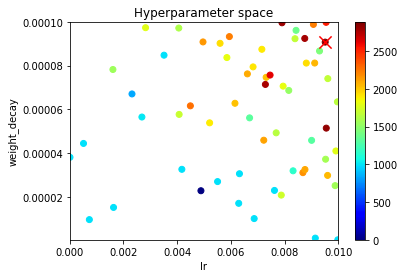

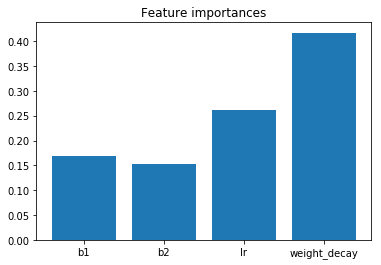

{'b1': 0.286217118821886, 'b2': 0.3314014091836303, 'lr': 0.009512098426157866, 'weight_decay': 9.076488481657977e-05}


In [54]:
vals, loss = getSpaceAndLoss('../db/hyperopt_convae_88b0c20c1-e240-4f71-868c-8fe8dce029a1.db')
plotSpace(vals, loss, 'lr', 'weight_decay')
plotFeatureImportances(vals, loss)
print(getBestVals(vals, loss))

In [85]:
vals1, loss1 = getSpaceAndLoss('../db/hyperopt_convae_8448265bd-07c9-4e73-a080-dd2966adc47b.db')
vals2, loss2 = getSpaceAndLoss('../db/hyperopt_convae_84a25e402-4417-427b-8859-2ad2a8fa639f.db')
vals3, loss3 = getSpaceAndLoss('../db/hyperopt_convae_88b0c20c1-e240-4f71-868c-8fe8dce029a1.db')
vals4, loss4 = getSpaceAndLoss('../db/hyperopt_convae_8ac17c0f8-01dd-4db3-aa29-2ba4553e2e3a.db')
vals5, loss5 = getSpaceAndLoss('../db/hyperopt_convae_8b68ab0e1-d065-4e89-a7f4-f07f462d4f42.db')
vals6, loss6 = getSpaceAndLoss('../db/hyperopt_convae_8bcf07885-3fde-46e7-b1e7-ce02aea647c4.db')

In [86]:
total_b1 = np.concatenate((
    vals1['b1'], 
    vals2['b1'], 
    vals3['b1'], 
    vals4['b1'], 
    vals5['b1'], 
    vals6['b1']
))
total_b2 = np.concatenate((
    vals1['b2'], 
    vals2['b2'], 
    vals3['b2'], 
    vals4['b2'], 
    vals5['b2'], 
    vals6['b2']
))
total_lr = np.concatenate((
    vals1['lr'], 
    vals2['lr'], 
    vals3['lr'], 
    vals4['lr'], 
    vals5['lr'], 
    vals6['lr']
))
total_weight_decay = np.concatenate((
    vals1['weight_decay'], 
    vals2['weight_decay'], 
    vals3['weight_decay'], 
    vals4['weight_decay'], 
    vals5['weight_decay'], 
    vals6['weight_decay']
))

total_loss = np.concatenate((
    loss1, 
    loss2, 
    loss3, 
    loss4, 
    loss5, 
    loss6
))

In [87]:
total_vals = {
    'b1': total_b1,
    'b2': total_b2,
    'lr': total_lr,
    'weight_decay': total_weight_decay
}

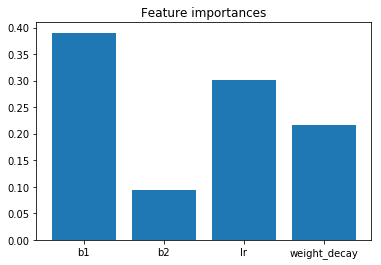

{'b1': 0.5268863322451123, 'b2': 0.6711591429799673, 'lr': 0.000302909736315133, 'weight_decay': 1.0094445180612116e-06}


In [88]:
plotSpace(total_vals, total_loss, 'lr', 'weight_decay')
plotFeatureImportances(total_vals, total_loss)
print(getBestVals(total_vals, total_loss))

In [89]:
idx = (-total_loss).argsort()[:2]
idx

array([321, 322])

In [92]:
total_loss[322]

3888.0

In [93]:
for k in total_vals.keys():
    print('{} : {}'.format(k, total_vals[k][322]))

b1 : 0.5081828524337727
b2 : 0.6352343895901826
lr : 0.0006350510436060733
weight_decay : 3.527816804859287e-07


In [83]:
np.max(total_loss)

3097.0

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [80]:
feature_names = list(total_vals.keys())
X = np.array([total_vals[i] for i in feature_names]).T
scaler = RobustScaler()

pca = PCA(n_components=2)
rX = pca.fit_transform(scaler.fit_transform(X))

In [81]:
pca.explained_variance_

array([0.50763651, 0.42261905])

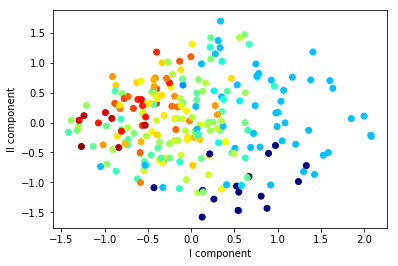

In [82]:
plt.scatter(x=rX[:,0], y=rX[:,1], c=total_loss, cmap=cm.jet)
plt.xlabel('I component')
plt.ylabel('II component')
plt.show()

In [78]:
pca.singular_values_

array([11.01476856, 10.05017179])

In [79]:
pca.components_

array([[ 0.66781461,  0.37210028, -0.60341835, -0.22682885],
       [-0.57366482,  0.30404974, -0.61539719,  0.44693257]])

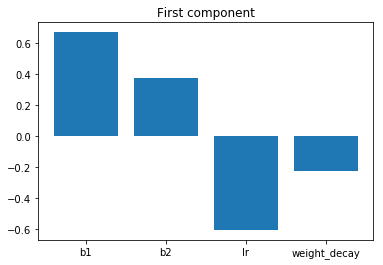

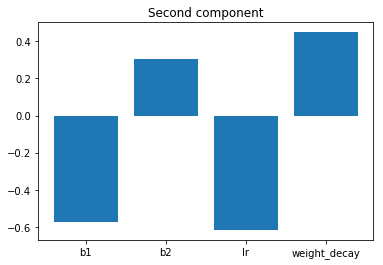

In [69]:
plt.title('First component')
plt.bar(x=feature_names, height=pca.components_[0])
plt.show()

plt.title('Second component')
plt.bar(x=feature_names, height=pca.components_[1])
plt.show()